In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

from sklearn.cluster import KMeans, k_means
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

import config
# Folder
folder = './training/Final/'

file =  folder + 'dataset.csv'

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
frame = pd.read_csv(file, sep='|')
frame.head()

,content,industries,location,title,type_empl,url,wage,suburb,experiences,title_left_over
0,Queensland Audit Office Investing in analytics...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/38867796?type=prom...,128999.5,CBD & Inner Suburbs,General,Analyst - Audit Analytics
1,Working for this market leader within the Fina...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/38986499?type=stan...,128999.5,CBD & Inner Suburbs,General,Head of Data Analytics & Performance
2,Queensland Audit Office Investing in analytics...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/39008462?type=stan...,128999.5,CBD & Inner Suburbs,General,Analyst - Audit Analytics
3,New Data Analyst opportunity with a well-known...,Information & Communication Technology,Brisbane,DA,Contract,https://www.seek.com.au/job/38942920?type=stan...,128999.5,CBD & Inner Suburbs,General,Data Analyst
4,Information Technology Services The Division o...,Information & Communication Technology,Brisbane,SDA,Permanent,https://www.seek.com.au/job/39005084?type=stan...,154275.0,Brisbane,Senior,Senior Business Analyst / Data Modeller


In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 10 columns):
content            1569 non-null object
industries         1569 non-null object
location           1569 non-null object
title              1569 non-null object
type_empl          1569 non-null object
url                1569 non-null object
wage               1569 non-null float64
suburb             1569 non-null object
experiences        1569 non-null object
title_left_over    1569 non-null object
dtypes: float64(1), object(9)
memory usage: 122.7+ KB


In [4]:
frame.drop(columns=['content','experiences','title_left_over','url','suburb'] ,axis=1, inplace=True)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 5 columns):
industries    1569 non-null object
location      1569 non-null object
title         1569 non-null object
type_empl     1569 non-null object
wage          1569 non-null float64
dtypes: float64(1), object(4)
memory usage: 61.4+ KB


In [5]:
frame = frame[frame['wage']>50000]

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1568
Data columns (total 5 columns):
industries    1505 non-null object
location      1505 non-null object
title         1505 non-null object
type_empl     1505 non-null object
wage          1505 non-null float64
dtypes: float64(1), object(4)
memory usage: 70.5+ KB


In [7]:
# frame = frame[frame['wage'] > 10000]
# frame.info()

Text(0.5, 0.98, 'Distributions of content over the year')

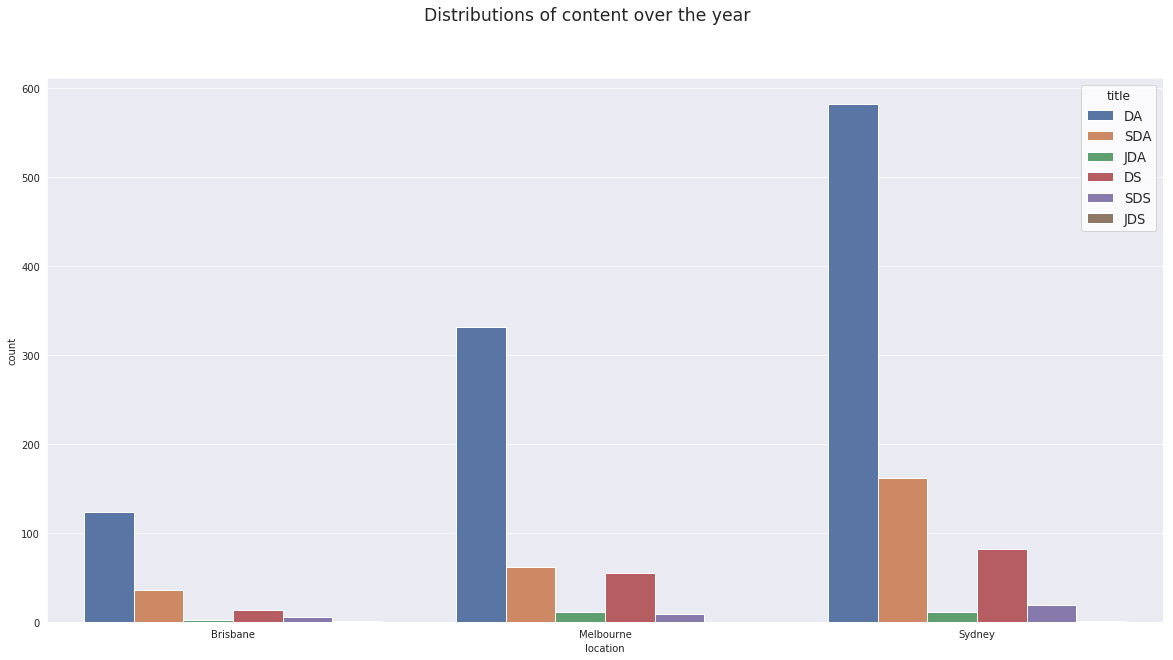

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.set(style="whitegrid", color_codes=True, font_scale=1.2)
# sns.countplot(x='year', data=df_datetime, orient='h')
sns.countplot(x='location',hue='title', data=frame, orient='h')
fig.suptitle('Distributions of content over the year')
# sns.barplot(x='title',y='wage',data=frame)

Text(0.5, 0.98, 'Length of text for each title')

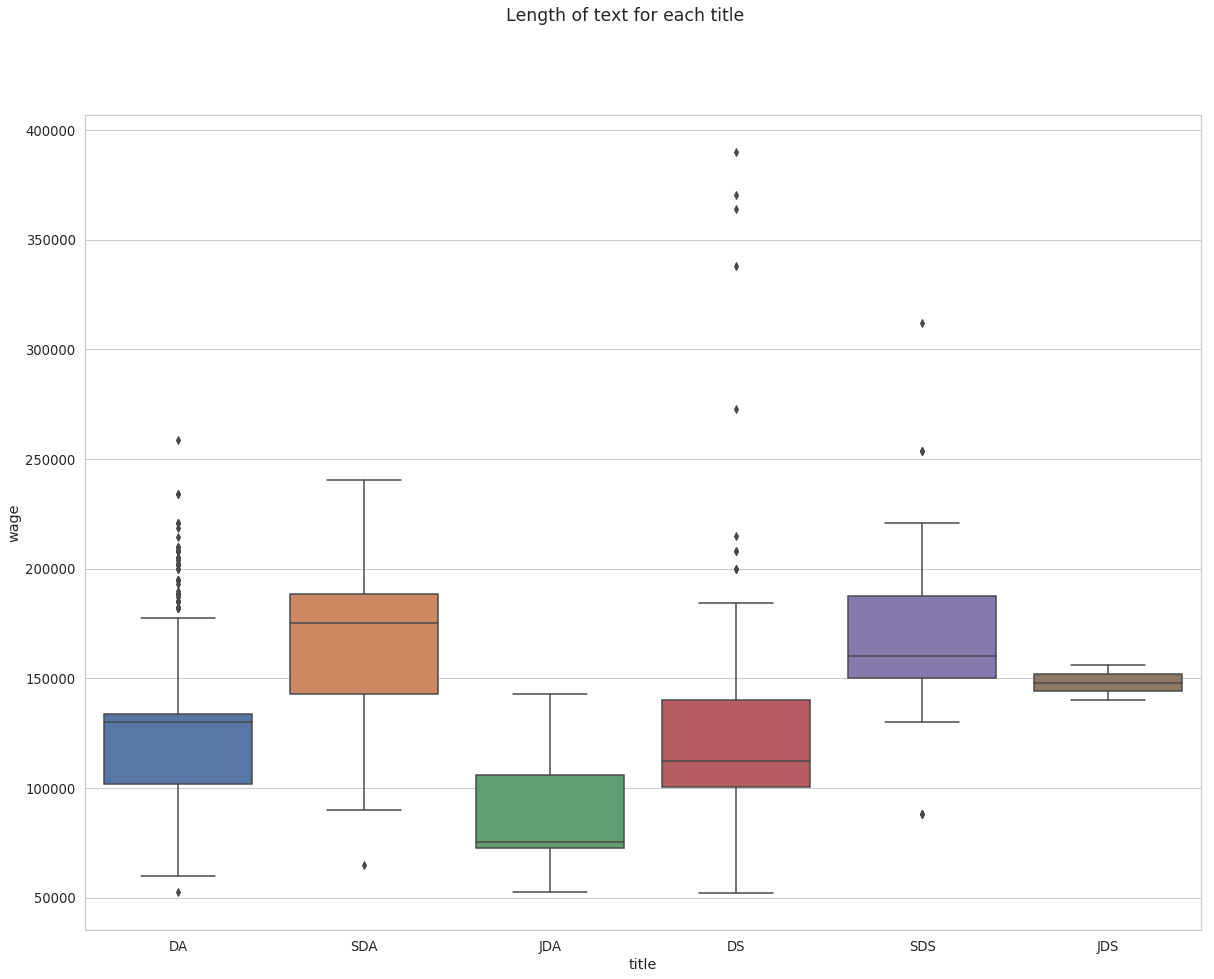

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20,15))
sns.boxplot(x='title' , y='wage', data=frame)
fig.suptitle('Length of text for each title')

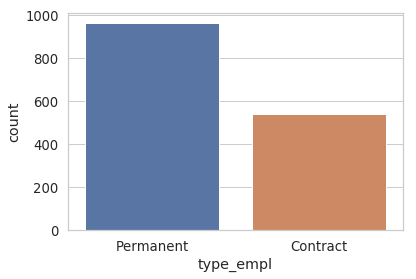

In [10]:
sns.countplot(x='type_empl',data=frame)

In [11]:
frame['type_empl'].value_counts(normalize=True).max()*100

63.98671096345515

In [12]:
y = frame['wage'].values
df_dummies = frame.copy()
df_dummies.drop(labels=['wage'],axis=1,inplace=True)
X = pd.get_dummies(df_dummies, prefix=df_dummies.columns, columns=df_dummies.columns)


In [13]:
y_temp = pd.DataFrame(y,columns=['wage'])
df_temp = pd.concat([X,y_temp])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3010 entries, 0 to 1504
Data columns (total 22 columns):
industries_Accounting                                1505 non-null float64
industries_Banking & Financial Services              1505 non-null float64
industries_Consulting & Strategy                     1505 non-null float64
industries_Government & Defence                      1505 non-null float64
industries_Information & Communication Technology    1505 non-null float64
industries_Insurance & Superannuation                1505 non-null float64
industries_Manufacturing, Transport & Logistics      1505 non-null float64
industries_Marketing & Communications                1505 non-null float64
industries_Sales                                     1505 non-null float64
industries_Science & Technology                      1505 non-null float64
location_Brisbane                                    1505 non-null float64
location_Melbourne                                   1505 non-null f

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


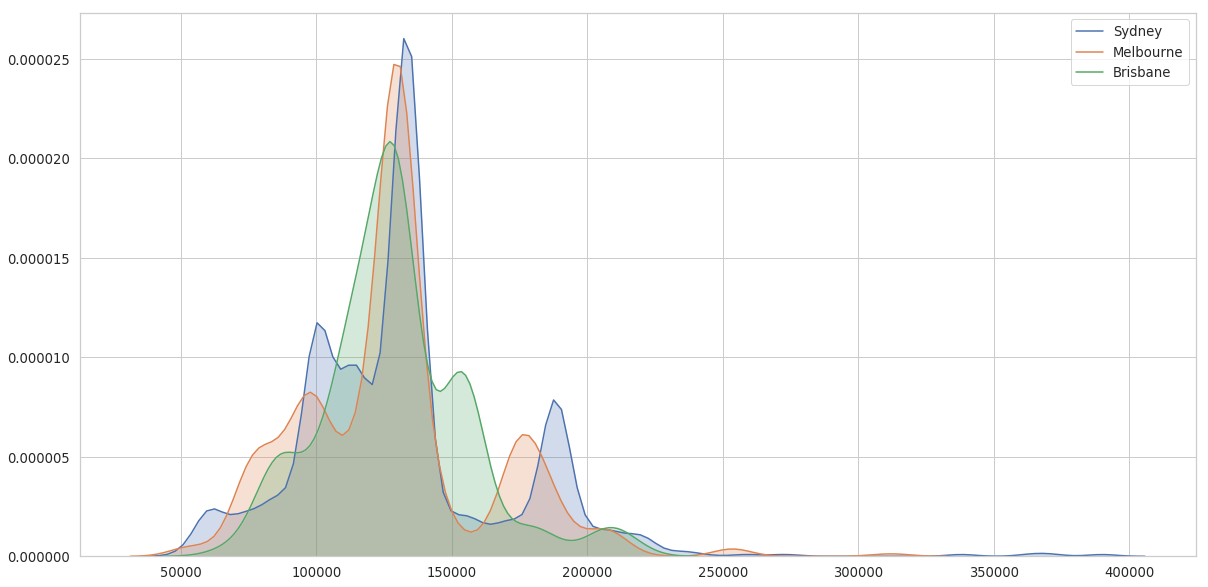

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
# Salary Distribution Within location
for city in config.LOCATIONS:
    sns.kdeplot(frame[frame['location'] == city]['wage'], cbar=True, 
                shade=True, ax=ax, bw='scott',label=city)

([0], <a list of 1 Text xticklabel objects>)

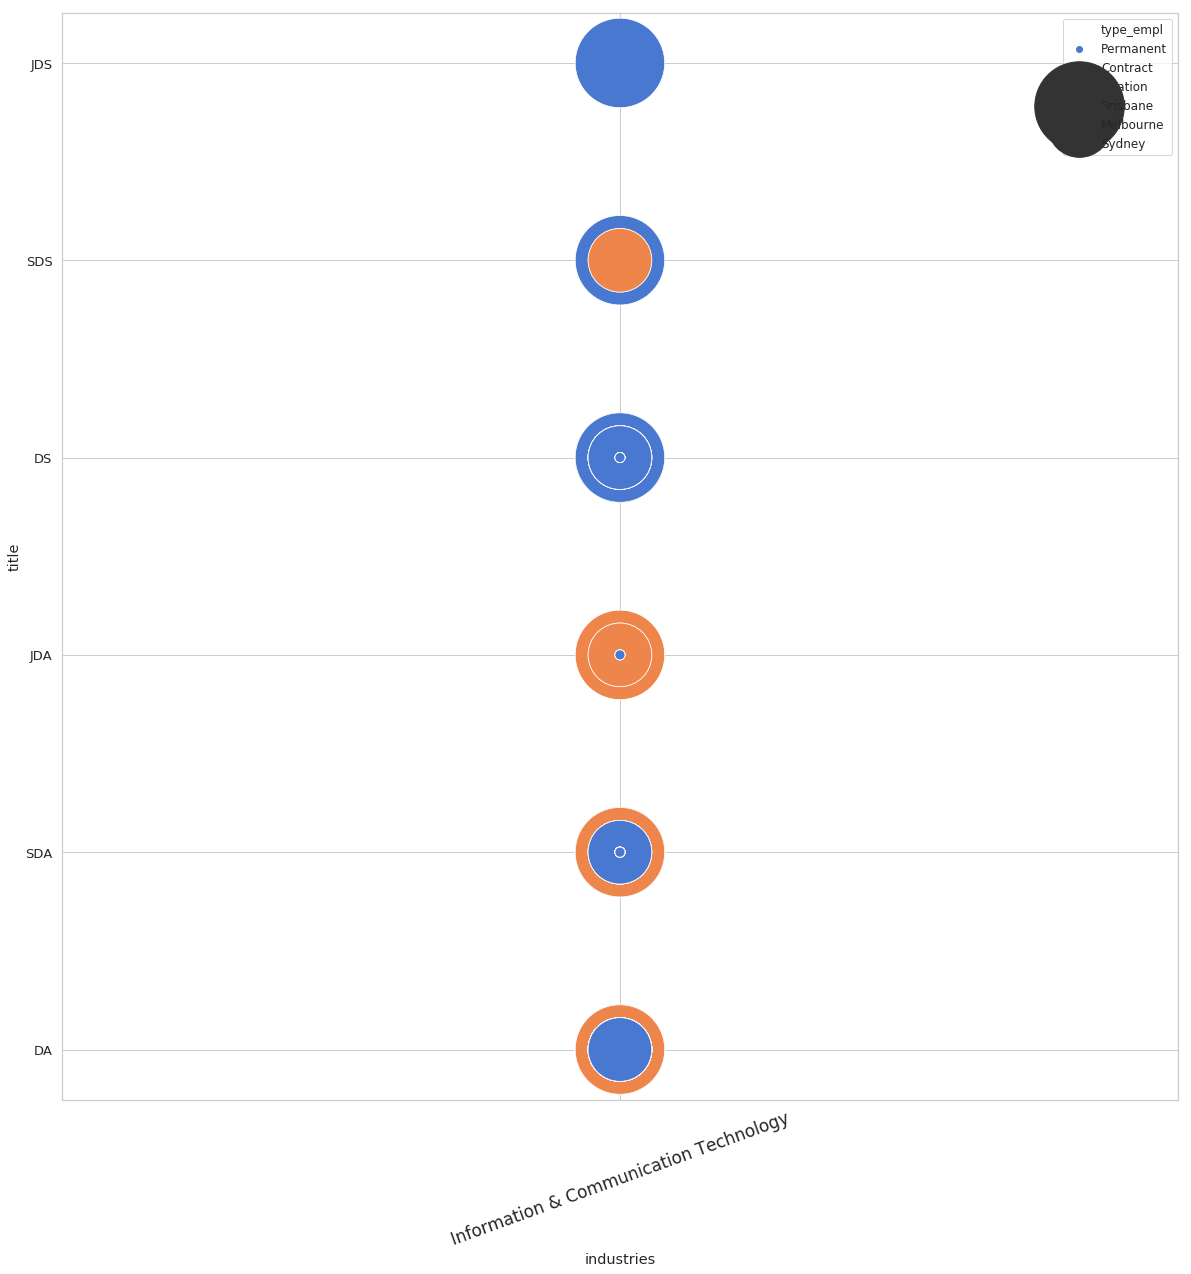

In [15]:
plt.figure(figsize=(20,20))
df_Sydney = frame[frame['industries'] == 'Information & Communication Technology']
sns.scatterplot(y='title',x='industries',data=df_Sydney,sizes=(100, 8000),
                alpha=1, palette='muted', legend='brief',hue='type_empl',size='location')
plt.legend(fontsize=12)
plt.yticks(fontsize=13)
plt.xticks(rotation=20, fontsize=17)

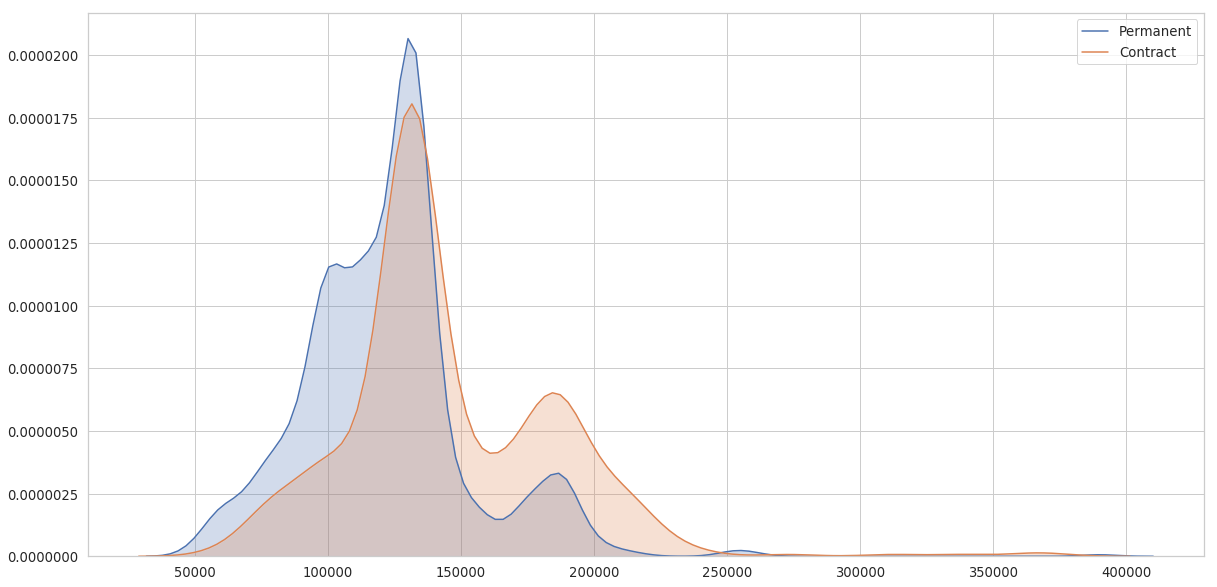

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
# Salary Distribution Within location
for jd in frame['type_empl'].unique():
    sns.kdeplot(frame[frame['type_empl'] == jd]['wage'], cbar=True, shade=True, ax=ax, bw='scott',label=jd)

(array([ 25000.,  50000.,  75000., 100000., 125000., 150000., 175000.,
        200000., 225000., 250000., 275000.]),
 <a list of 11 Text xticklabel objects>)

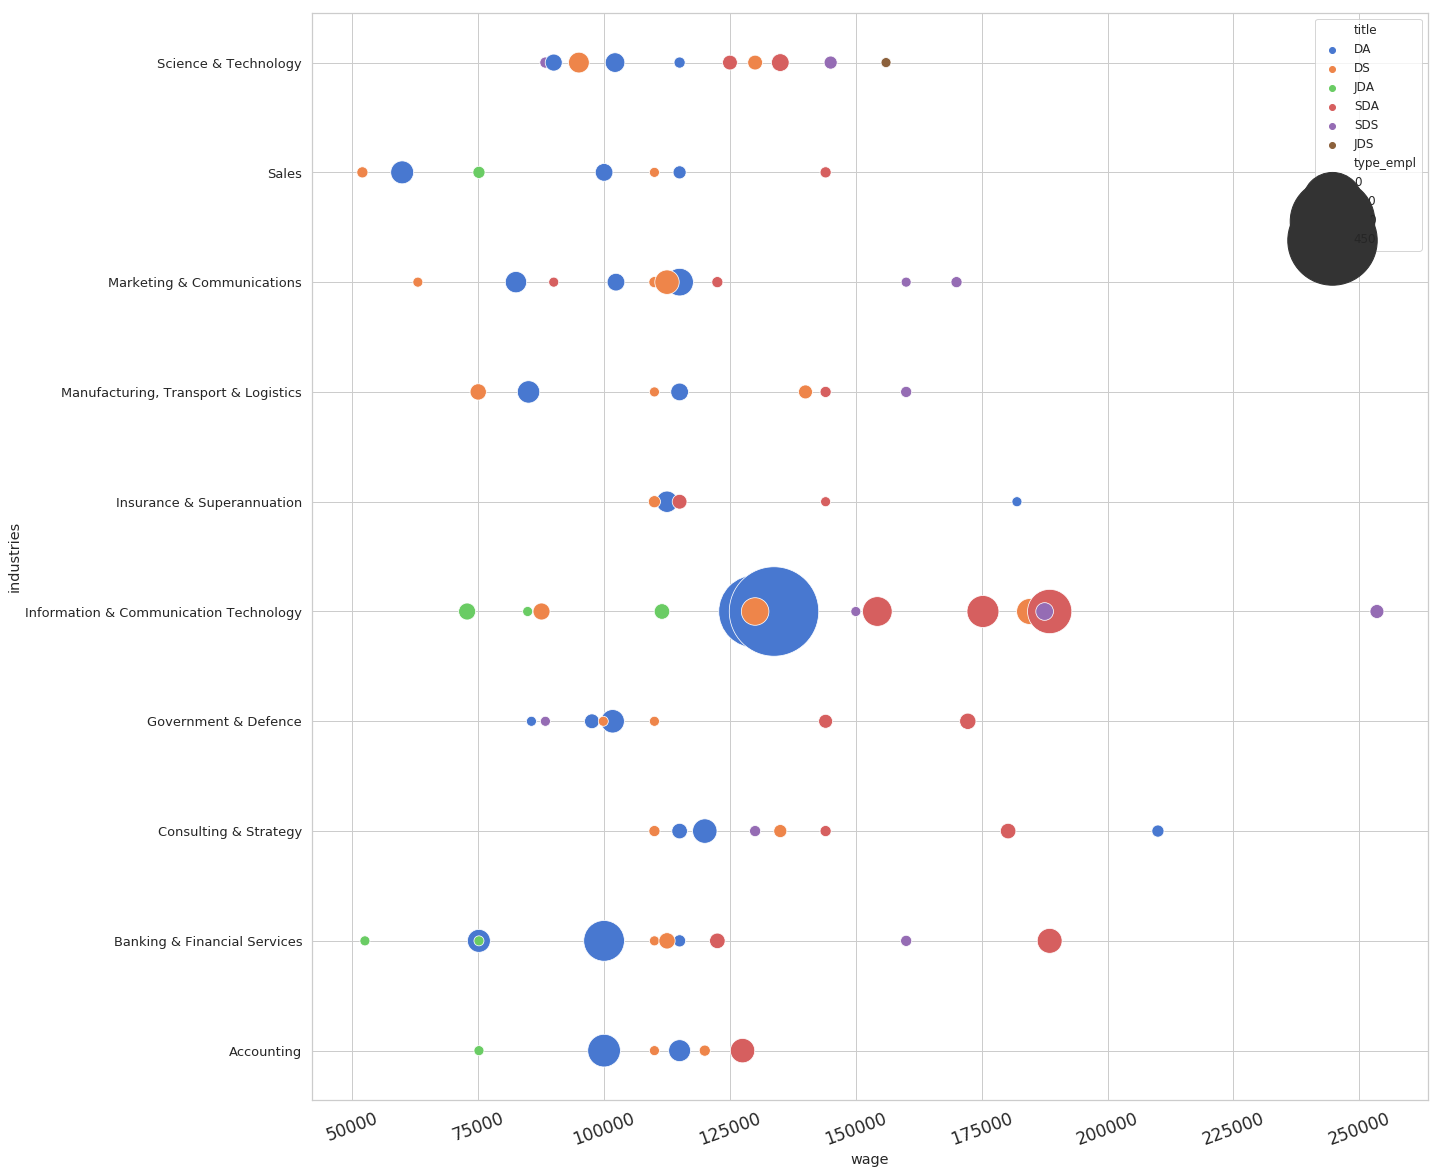

In [17]:
grouped_frame = pd.DataFrame(frame.groupby(['industries','location','title'])['wage'].median())
grouped_frame = pd.concat([grouped_frame, pd.DataFrame(frame.groupby(['industries','location','title'])['type_empl'].count())],axis=1)
grouped_frame.reset_index(inplace=True)
plt.figure(figsize=(20,20))
sns.scatterplot(y='industries',x='wage',data=grouped_frame,sizes=(100, 8000),
                alpha=1, palette='muted', legend='brief',hue='title',size='type_empl')
plt.legend(fontsize=12)
# plt.ylabel('')
plt.yticks(fontsize=13)
plt.xticks(rotation=20, fontsize=17)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1053, 21), (1053,), (452, 21), (452,))

## 1. Linear

In [32]:
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)
m = lm_model.coef_[0]
b = lm_model.intercept_

print("formula: y = {}x + {}".format(m,b))

formula: y = 1.8335105624129475e+17x + -9.154000280604513e+17


In [33]:
y_pred = lm_model.predict(X_test)
print("Our score: ", lm_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

Our score:  0.5321929371715877
Variance score:  0.5321929371715877
Mean square error:  631312254.3938053


In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """


In [35]:
lm2 = LinearRegression()
lm2_model = lm.fit(X_train,y_train)
m = lm2_model.coef_[0]
b = lm2_model.intercept_

print("formula: y = {}x + {}".format(m,b))
y_pred = lm2_model.predict(X_test)
print("Our score: ", lm2_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

formula: y = -5863208670038629.0x + 130890.72779631753
Our score:  0.5321467058877732
Variance score:  0.5321467058877732
Mean square error:  631374644.1658449


In [36]:
y_test.shape, y_pred.shape

((452,), (452,))

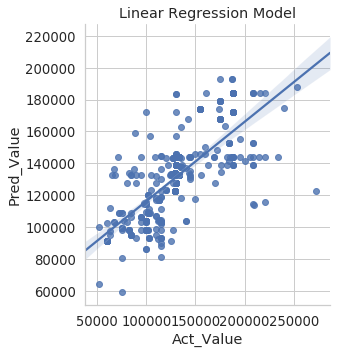

In [37]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([np.array(y_test),y_pred])
helper = helper.transpose()
helper.columns = columns

sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Linear Regression Model");


In [38]:
logreg = LogisticRegression()
y_train = np.asarray(y_train, dtype="int")
y_test = np.asarray(y_test, dtype="int")
logreg.fit(X_train,y_train)
logreg.score(X_test, y_test)

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6946902654867256

In [39]:
y_pred = logreg.predict(X_test)
len(y_pred), len(y_test)

(452, 452)

In [40]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([y_test,y_pred])
helper = helper.transpose()
helper.columns = columns
helper.head()

,Act_Value,Pred_Value
0,133750,133750
1,59899,100000
2,133750,133750
3,97500,100000
4,100000,100000


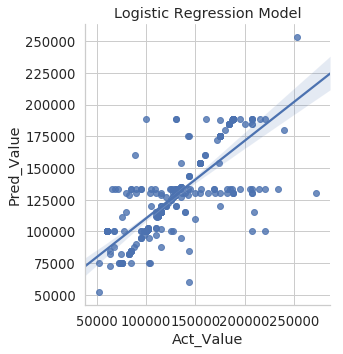

In [41]:
sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Logistic Regression Model");

## 2. Classification

In [42]:
### KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Baseline
print("Baseline: ",frame['title'].value_counts(normalize=True)*100)

knn6 = KNeighborsClassifier(n_neighbors=6, weights='uniform')

Baseline:  DA     68.837209
SDA    17.275748
DS      9.966777
SDS     2.192691
JDA     1.594684
JDS     0.132890
Name: title, dtype: float64


In [43]:
skf = StratifiedKFold(n_splits=5)
cv_indices = skf.split(X, y)
cv_indices = [[tr,te] for tr,te in cv_indices]

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [49]:
# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        print(train_i)
        print(len(X))
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = y[train_i]
        Y_test = y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print(('Fold accuracy:', acc))
        
    print(('Mean CV accuracy:', np.mean(scores)))
    return scores


In [51]:
ss = StandardScaler().fit(X_train)
Xs = ss.transform(X_train)

In [52]:
scores = accuracy_crossvalidator(Xs, y, knn6, cv_indices)

('Mean CV accuracy:', nan)


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## 3. PCA & Clustering

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[[0.00000000e+00 1.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.00000000e+00 1.50500000e+03 0.00000000e+00 3.00000000e+00]
 [6.00000000e+00 1.50600000e+03 0.00000000e+00 4.00000000e+00]
 ...
 [3.00200000e+03 3.00500000e+03 2.28307153e+01 6.31000000e+02]
 [3.00000000e+03 3.00400000e+03 2.79241868e+01 8.74000000e+02]
 [3.00600000e+03 3.00700000e+03 3.52072417e+01 1.50500000e+03]]


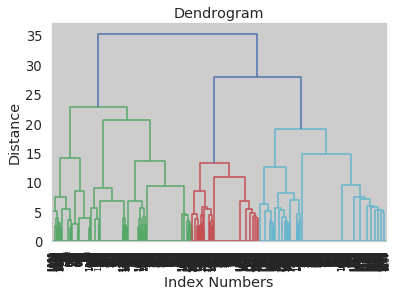

In [53]:
## Dendograme
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    print(Z)
    
    # plotting
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    
plot_dendogram(X)

In [ ]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print(("Clusters represented at distance: ", set(clusters)))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

#     ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

#     ax[0].set_title("Max Dist: %d" % max_dist)
    
#     # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
#     ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax.plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax.set_title('Dendrogram')
    ax.set_xlabel('Index Numbers')
    ax.set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

In [ ]:
Z = linkage(X, 'ward')
plot_dist_thresh(30)
plot_dist_thresh(23)
plot_dist_thresh(17)

In [ ]:
cluster_kmean = KMeans(n_clusters=6, random_state=0).fit(X)

predicted = cluster_kmean.labels_
centroids = cluster_kmean.cluster_centers_

print(("Predicted clusters to points: ", predicted))
print("Location of centroids: ")
print(centroids)

## Ensemble methods & Decision Tree Models

In [44]:
## DecisionTree
dt = DecisionTreeClassifier()
print("Decision Tree:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(dt, X_train, y_train, cv=5).mean())
dt.fit(X_train, y_train)
print("DecisionTree [TRAIN] Score: ", dt.score(X_train, y_train))
print("DecisionTree [TEST] Score: ", dt.score(X_test, y_test))
print("===============================")

Decision Tree:
-------------------------
Cross Validation Score:  0.7636569223654124
DecisionTree [TRAIN] Score:  0.7825261158594492
DecisionTree [TEST] Score:  0.745575221238938


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [45]:
## BaggingClassifier
bag = BaggingClassifier(n_estimators=1000)
print("Bagging Classifier Tree:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(bag, X_train, y_train, cv=5).mean())
bag.fit(X_train, y_train)
print("BaggingClassifier [TRAIN] Score: ", bag.score(X_train, y_train))
print("BaggingClassifier [TEST] Score: ", bag.score(X_test, y_test))
print("===============================")

Decision Tree:
-------------------------


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Score:  0.7664695628016436
BaggingClassifier [TRAIN] Score:  0.7825261158594492
BaggingClassifier [TEST] Score:  0.745575221238938


In [46]:
## RandomforestClassication
rfc = RandomForestClassifier(n_estimators=10000)
print("Random-Forest Classifier:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(rfc, X_train, y_train, cv=5).mean())
rfc.fit(X_train, y_train)
print("RandomForestClassifier [TRAIN] Score: ", rfc.score(X_train, y_train))
print("RandomForestClassifier [TEST] Score: ", rfc.score(X_test, y_test))
print("===============================")

Random-Forest Classifier:
-------------------------


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Score:  0.7700128847811951
RandomForestClassifier [TRAIN] Score:  0.7825261158594492
RandomForestClassifier [TEST] Score:  0.745575221238938


In [47]:
## ExtraTrees Classification
et = ExtraTreesClassifier(n_estimators=10000)
print("Extra-Trees Classifier:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(et, X_train, y_train, cv=5).mean())
et.fit(X_train, y_train)
print("ExtraTrees Classifier [TRAIN] Score: ", et.score(X_train, y_train))
print("ExtraTrees Classifier [TEST] Score: ", et.score(X_test, y_test))
print("===============================")

Extra-Trees Classifier:
-------------------------


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Score:  0.7660168123923012
ExtraTrees Classifier [TRAIN] Score:  0.7825261158594492
ExtraTrees Classifier [TEST] Score:  0.745575221238938


## SVM

In [54]:
def plot_svm(clf):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))

    # create grid to evaluate model
    xy = np.vstack([xx2.ravel(), yy2.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx2.shape)

    # plot decision boundary and margins
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.binary, alpha=0.2)
    ax.contour(xx2, yy2, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if not isinstance(clf, LinearSVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
               linewidth=1, facecolors='none', edgecolors='k')
        print (clf.support_vectors_)
        
    plt.show()
    

In [ ]:
fsd=

In [55]:
sv = SVC(kernel='poly', degree=3, C=1000)
sv.fit(X_train, y_train)
# plot_svm(sv)

y_pred = sv.predict(X_test)
cross_val_score(sv,X_train, y_train,cv=5, scoring='accuracy').mean()

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/shayne/Anaconda3/envs/caps_env/lib/p

0.761129111857542

In [ ]:
clf = SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# check the results of the grid search
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
best_svm = grid.best_estimator_

In [ ]:
# Start with logistic Regression
logistic = LogisticRegression()
print(cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy').mean())


# Let's try a SVM
clf = SVC()
print(cross_val_score(clf, X_train,y_train, cv=5, scoring='accuracy').mean())